In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import re
import os

In [42]:
csv_path = os.path.join('..', '..', 'data', '311_subset__date_time_split.csv')
df = pd.read_csv(csv_path)
df.count()

Unnamed: 0              275281
Unnamed: 0.1            275281
service_request_id      275281
status_description      275281
mobile_web_status       275281
duplicate_verified      275281
override_duplicate      275281
functional_location     249932
source                  275280
requested_datetime      275281
closed_date             125670
updated_datetime        158982
open                    275281
closed                  275281
description             273914
agency_responsible      274720
service_name            274244
service_subtype          72326
lat                     275281
long                    275281
sap_problem_category    156983
sap_problem_type        156964
address                 274431
case_record_type        275281
district                274405
req_date                275281
req_time                275281
dtype: int64

In [43]:
service_df = df.groupby('service_name')

In [44]:
service = service_df['service_request_id'].sum().sort_values()

In [45]:
service

service_name
TRANSFORMER                       310088
GEARBOX                           311113
SPILLWAY                          314549
BRIDGE                            318661
DRAINAGE DITCH                    326381
DRAINAGE CULVERT                  613982
CONVEYANCES                       948420
DRAIN SYSTEM                     1555386
CHANNEL                          1566553
DRAIN CLEANOUT                   1937726
DRAIN_STR                        2542542
Over Irrigation                  3162813
DEBRIS FENCE                     4783915
Illegal Discharge                8484105
DRAIN INLET                     14891929
TREE                            28685104
Parking                         31960640
ROW MAINTENANCE                 41093115
Parking Meter                   44781252
PAVEMENT                        76429892
Damaged Guardrail              117408587
Street Flooded                 271736255
Street Sweeping                340845440
Faded Striping                 382284726
Dea

''

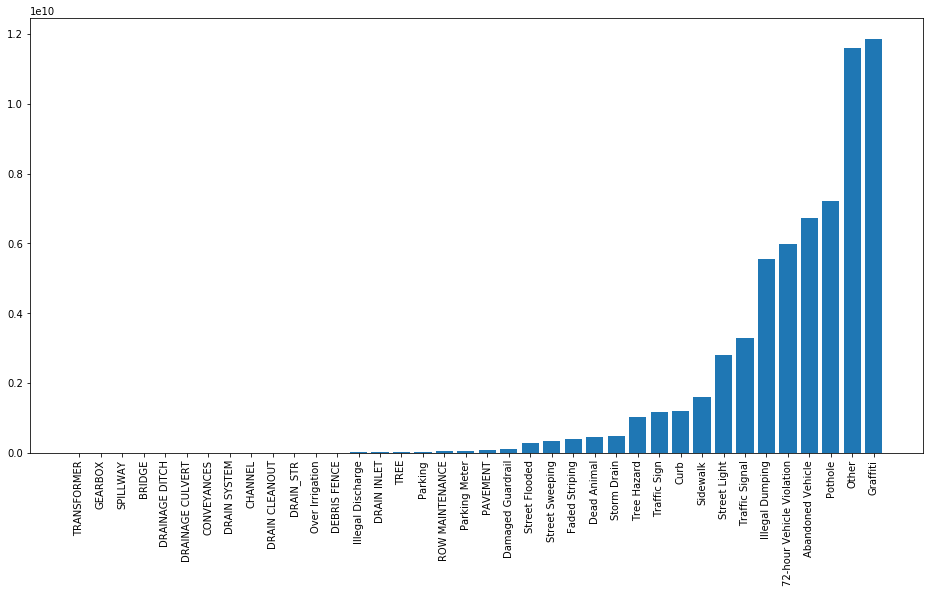

In [138]:
fig, ax = plt.subplots(figsize=[16, 8])
ax.bar(service.index, service)
plt.xticks(rotation='90')
''

In [47]:
df['address'].describe()

count                                    274431
unique                                   164558
top       6767 Neptune Place, La Jolla, CA, USA
freq                                        775
Name: address, dtype: object

In [49]:
df.count()

Unnamed: 0              275281
Unnamed: 0.1            275281
service_request_id      275281
status_description      275281
mobile_web_status       275281
duplicate_verified      275281
override_duplicate      275281
functional_location     249932
source                  275280
requested_datetime      275281
closed_date             125670
updated_datetime        158982
open                    275281
closed                  275281
description             273914
agency_responsible      274720
service_name            274244
service_subtype          72326
lat                     275281
long                    275281
sap_problem_category    156983
sap_problem_type        156964
address                 274431
case_record_type        275281
district                274405
req_date                275281
req_time                275281
dtype: int64

In [114]:
df['year'] = df['req_date'].map(lambda x: re.sub('(\d{4})-\d{2}-\d{2}', r'\1', x))
df['month'] = df['req_date'].map(lambda x: re.sub('\d{4}-(\d{2})-\d{2}', r'\1', x))
df['day'] = df['req_date'].map(lambda x: re.sub('\d{4}-\d{2}-(\d{2})', r'\1', x))

In [115]:
df[['year', 'month', 'day']].head()

,year,month,day
0,2018,07,29
1,2018,07,29
2,2018,07,29
3,2018,07,29
4,2018,07,29


In [132]:
months = df.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))
months

,month,service_request_id
0,January,27878
1,February,22118
2,March,24752
3,April,24603
4,May,27202
5,June,32215
6,July,30221
7,August,18028
8,September,17006
9,October,17419


<BarContainer object of 12 artists>

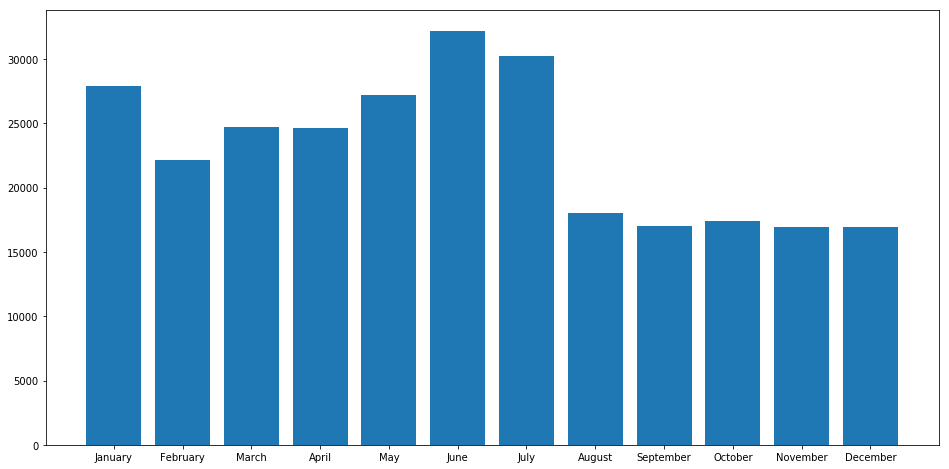

In [136]:
plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'])